In [17]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [19]:
import mitosheet

In [20]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [21]:
with open('Data/Data12_1/GB_result_12I1O_1.pkl', 'rb') as f:
    result = pickle.load(f)

In [22]:
df_r = pd.DataFrame(result)

In [23]:
r2 = df_r[3].apply(pd.Series)

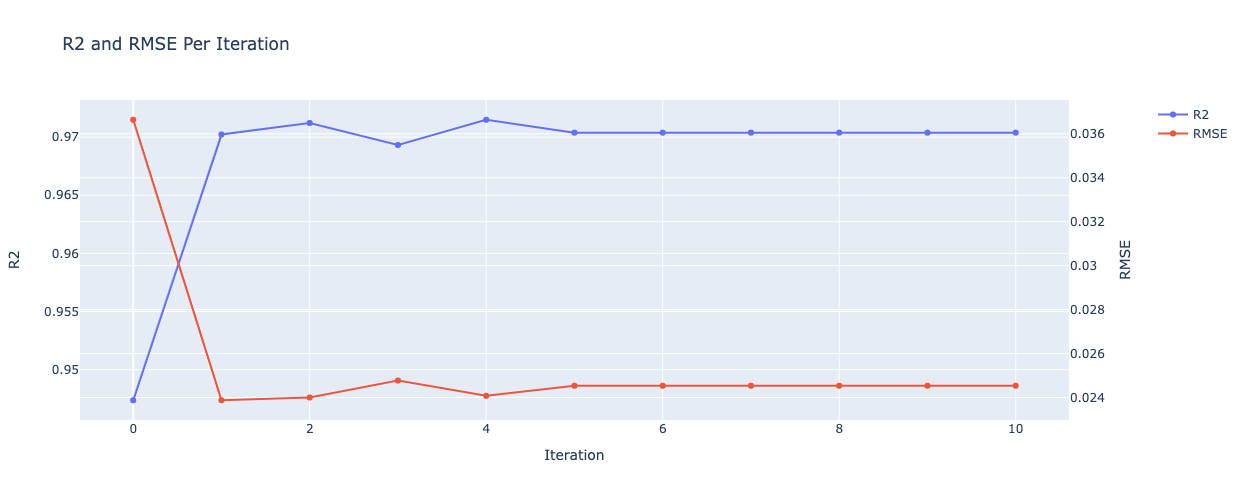

In [24]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(y =  r2.r2, x = r2.index, name = "R2"),  secondary_y=False)
fig.add_trace(go.Scatter(y =  r2.neg_root_mean_squared_error * -1, x = r2.index, name = "RMSE"), secondary_y=True)


fig.update_layout(title="R2 and RMSE Per Iteration",
                    xaxis_title='Iteration',
                    yaxis_title='R2',
                    yaxis2_title='RMSE',
                   autosize=False,
                   width=900,
                  height=500,
                 )
fig.update_layout(title_text = "R2 and RMSE Per Iteration")

fig.show()

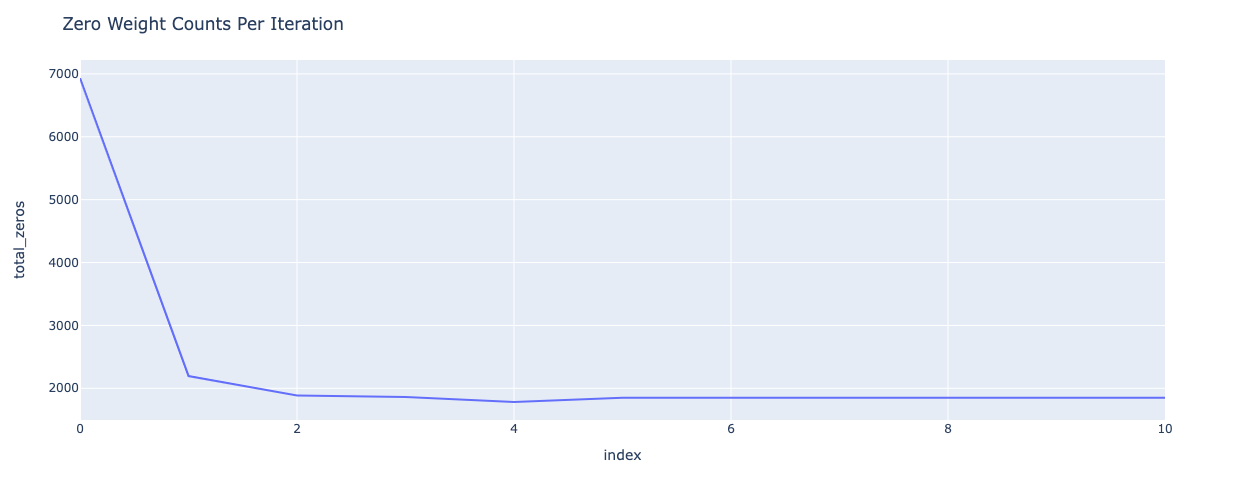

In [25]:
fig = px.line(r2, x=r2.index, y=r2.total_zeros)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Zero Weight Counts Per Iteration",
)

fig.show()

In [11]:
df_imp = pd.read_pickle('Data/Data12_1/GB_12I1O_1_df_imp.pkl')
df_imp

,Feature Name,Importance,index,Zero_Count,Iteration
0,Output 01,0.591168,Output 01,0,0
1,Input 03,0.066638,Input 03,550,0
2,Input 02,0.066527,Input 02,436,0
3,Input 11,0.047870,Input 11,507,0
4,Input 06,0.044040,Input 06,399,0
...,...,...,...,...,...
151,Input 07,0.008588,Input 07,108,10
152,Input 05,0.006567,Input 05,122,10
153,Input 01,0.004527,Input 01,170,10
154,Input 12,0.003372,Input 12,593,10


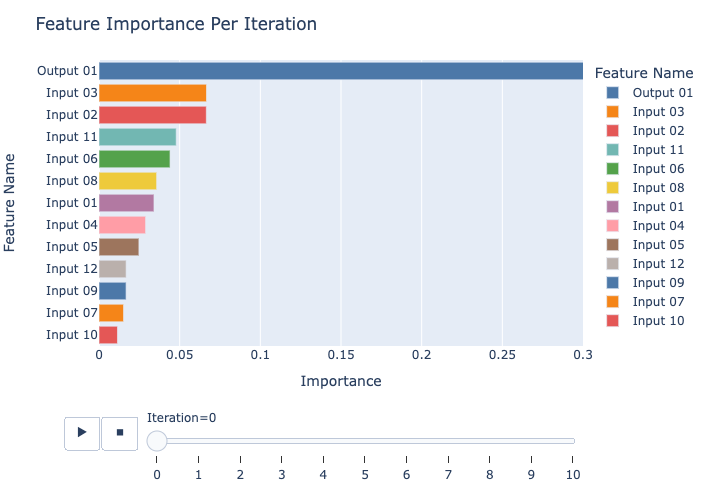

In [12]:
fig = px.bar(
    df_imp,
    y="Feature Name",
    x="Importance",
    color="Feature Name",
    color_discrete_sequence=px.colors.qualitative.T10,
    animation_frame="Iteration",
    animation_group="Feature Name",
    orientation="h",
    range_x=[0,0.3]
)

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)


fig.show()

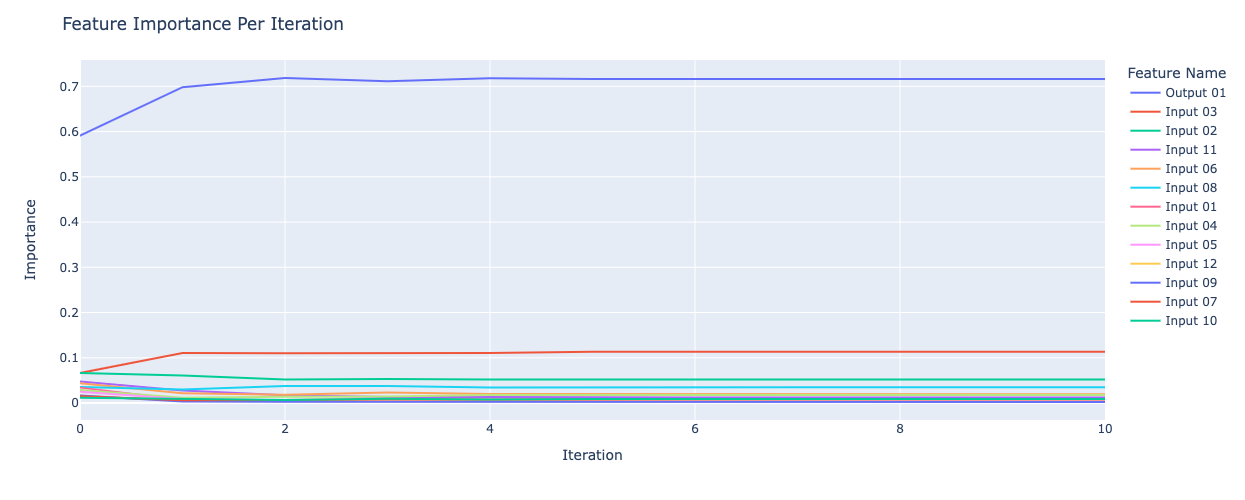

In [26]:
fig = px.line(df_imp, x='Iteration', y="Importance", color = "Feature Name")

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)

fig.show()